In [6]:
import numpy as np
from scipy import stats
#for computing z-score

import pandas as pd
#for inter quartile range and box plots

import matplotlib.pyplot as plt
import seaborn as sns
#to plot sample dataset to visually see outliers

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
#for clustering-based outlier detection

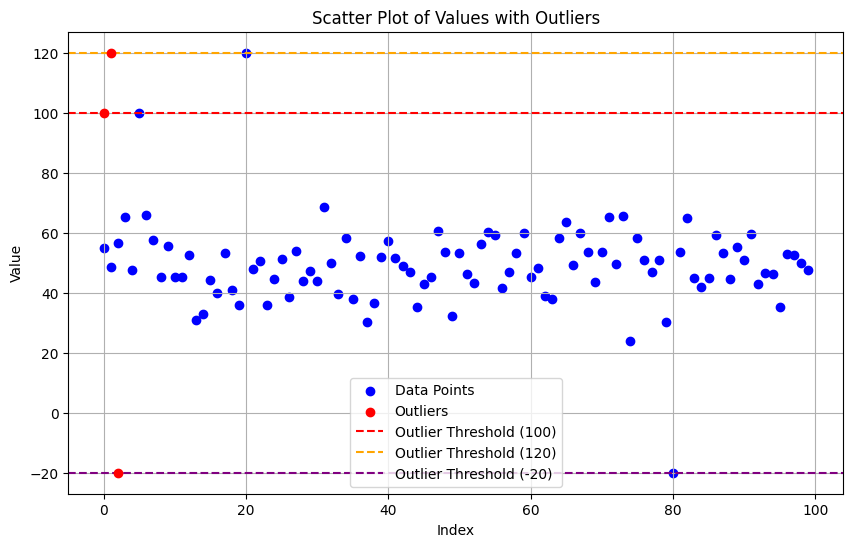

In [8]:
np.random.seed(42)

data = {
    'Value': np.random.normal(loc=50, scale=10, size=100).tolist()
}
#Array of 100 values, Mean location of 50, Standard Deviation of 10

# Manually introduce outliers
data['Value'][5] = 100
data['Value'][20] = 120
data['Value'][80] = -20

# Create a DataFrame
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
plt.scatter(x=np.arange(len(df)), y=df['Value'], color='blue', label='Data Points')
plt.title('Scatter Plot of Values with Outliers')
plt.xlabel('Index')
plt.ylabel('Value')

outliers = df['Value'][df['Value'].isin([100, 120, -20])]
plt.scatter(np.arange(len(outliers)), outliers, color='red', label='Outliers', zorder=5)

plt.axhline(y=100, color='red', linestyle='--', label='Outlier Threshold (100)')
plt.axhline(y=120, color='orange', linestyle='--', label='Outlier Threshold (120)')
plt.axhline(y=-20, color='purple', linestyle='--', label='Outlier Threshold (-20)')
plt.legend()
plt.grid()
plt.show()

In [10]:
# Z-Score Method
#Z-Score=(Data point - Mean)/SD
df['zscore'] = stats.zscore(df['Value'])

# Display the DataFrame with Z-scores
print(df[['Value', 'zscore']])

        Value    zscore
0   54.967142  0.393451
1   48.617357 -0.052139
2   56.476885  0.499396
3   65.230299  1.113659
4   47.658466 -0.119428
..        ...       ...
95  35.364851 -0.982122
96  52.961203  0.252687
97  52.610553  0.228080
98  50.051135  0.048475
99  47.654129 -0.119733

[100 rows x 2 columns]


In [11]:
#Inter Quartile Range
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = df[(df['Value'] < lower_bound) | (df['Value'] > upper_bound)]

# Display results
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Outliers detected using IQR:")
print(outliers_iqr)

Q1: 43.874401021766715
Q3: 55.00852473036764
IQR: 11.134123708600924
Lower Bound: 27.17321545886533
Upper Bound: 71.70971029326903
Outliers detected using IQR:
         Value    zscore
5   100.000000  3.553592
20  120.000000  4.957073
74   23.802549 -1.793496
80  -20.000000 -4.867300


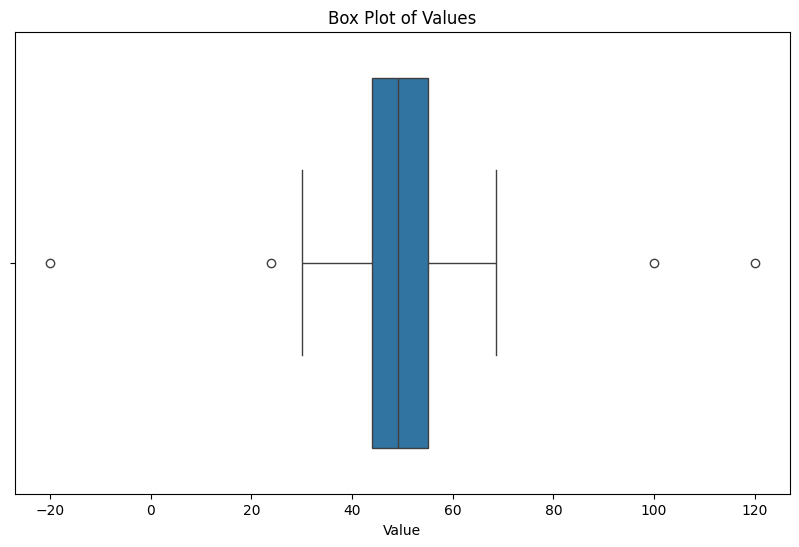

In [12]:
#Box Plot Method
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Value'])
plt.title('Box Plot of Values')
plt.xlabel('Value')
plt.show()

Clustered Data:
        Value    zscore  Cluster
0   54.967142  0.393451        0
1   48.617357 -0.052139        0
2   56.476885  0.499396        0
3   65.230299  1.113659        0
4   47.658466 -0.119428        0
..        ...       ...      ...
95  35.364851 -0.982122        0
96  52.961203  0.252687        0
97  52.610553  0.228080        0
98  50.051135  0.048475        0
99  47.654129 -0.119733        0

[100 rows x 3 columns]

Outliers detected using DBSCAN:
         Value    zscore  Cluster
5   100.000000  3.553592       -1
20  120.000000  4.957073       -1
74   23.802549 -1.793496       -1
80  -20.000000 -4.867300       -1


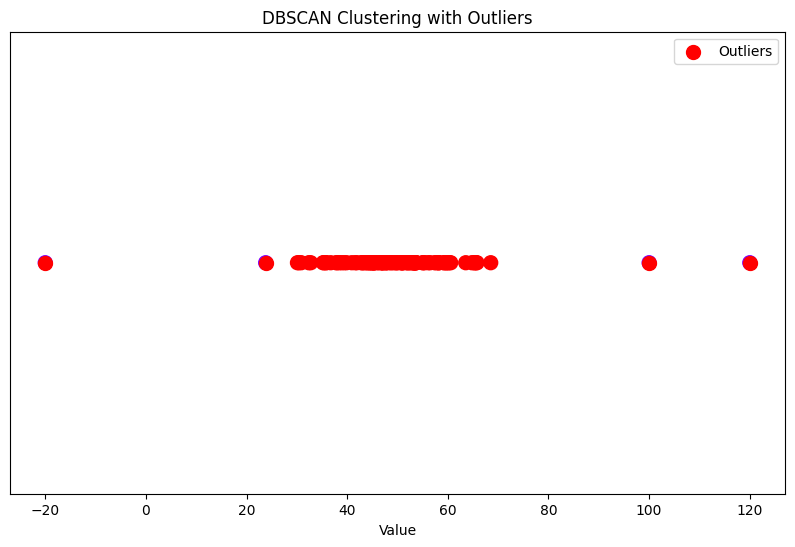

In [13]:
#Cluster based Method
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)
clusters = dbscan.fit_predict(data_scaled)

# Add cluster labels to the DataFrame
df['Cluster'] = clusters

# Identify outliers (label -1 indicates outliers)
outliers = df[df['Cluster'] == -1]

# Display results
print("Clustered Data:")
print(df)
print("\nOutliers detected using DBSCAN:")
print(outliers)

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Value'], np.zeros_like(df['Value']), c=df['Cluster'], cmap='rainbow', s=100)
plt.scatter(outliers['Value'], np.zeros_like(outliers['Value']), color='red', s=100, label='Outliers')
plt.title('DBSCAN Clustering with Outliers')
plt.xlabel('Value')
plt.yticks([])
plt.legend()
plt.show()